# Quickest usage of CovserPhy

## Preparation

In [1]:
import os
os.chdir("../")

In [2]:
import covsirphy as cs
cs.__version__

'2.4.2'

## Dataset preparation

In [3]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)

## Scenario analysis
As an example, we will analysis the number of cases in Italy.

In [4]:
scenario = cs.Scenario(jhu_data, population_data, country="Italy")

### Check records

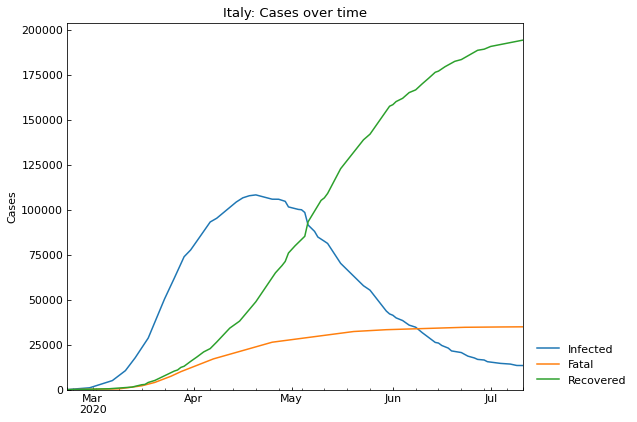

In [5]:
_ = scenario.records()

### S-R trend analysis

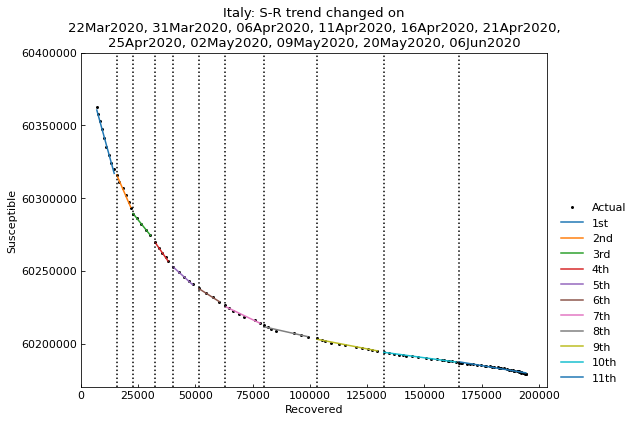

In [6]:
scenario.trend()

In [7]:
scenario.summary()

,Type,Start,End,Population
1st,Past,22Mar2020,30Mar2020,60421760
2nd,Past,31Mar2020,05Apr2020,60421760
3rd,Past,06Apr2020,10Apr2020,60421760
4th,Past,11Apr2020,15Apr2020,60421760
5th,Past,16Apr2020,20Apr2020,60421760
6th,Past,21Apr2020,24Apr2020,60421760
7th,Past,25Apr2020,01May2020,60421760
8th,Past,02May2020,08May2020,60421760
9th,Past,09May2020,19May2020,60421760
10th,Past,20May2020,05Jun2020,60421760


### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [8]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>
Running optimization with 8 CPUs...
	11th phase with SIR-F model finished 87 trials in 0 min 15 sec.
	1st phase with SIR-F model finished 53 trials in 0 min 10 sec.
	4th phase with SIR-F model finished 40 trials in 0 min 10 sec.
	5th phase with SIR-F model finished 44 trials in 0 min 10 sec.
	6th phase with SIR-F model finished 46 trials in 0 min 10 sec.
	2nd phase with SIR-F model finished 68 trials in 0 min 15 sec.
	3rd phase with SIR-F model finished 62 trials in 0 min 15 sec.
	8th phase with SIR-F model finished 41 trials in 0 min 10 sec.
	10th phase with SIR-F model finished 83 trials in 0 min 15 sec.
	7th phase with SIR-F model finished 126 trials in 0 min 25 sec.
	9th phase with SIR-F model finished 121 trials in 0 min 20 sec.
Completed optimization. Total: 0 min 50 sec


### Show the history of reproduction number

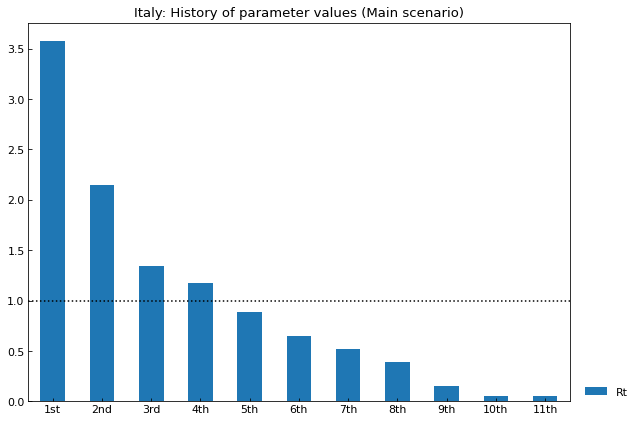

In [9]:
_ = scenario.param_history(targets=["Rt"], divide_by_first=False)

### Simulate the number of cases

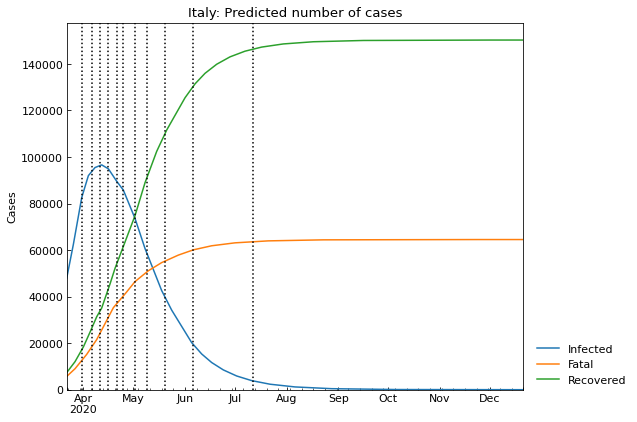

In [10]:
scenario.add_phase(end_date="01Jan2021")
_ = scenario.simulate()